# Assignment: Basic Web Scrapping and more...

Fill in your name here.

In [1]:
name = 'Roman Kein'
if name == '':
    raise NotImplementedError('Put your name')

You will receive points for:
- implementing the given tasks.
- using good practices such as OOP in some cases, or decorators.
- good code structure on the last task.
- handling edge cases and exceptions.
- comprehensive unit tests (by using any of the libraries seen. I recommend `unittest`).

We will need the following libraries, but of course you can add the libraries you prefer.

In [2]:
for _ in range(2):
    try:
        from bs4 import BeautifulSoup
        import requests
        import unittest
        import networkx as nx
    except ImportError:
        ! pip install beautifulsoup4
        ! pip install requests
        ! pip install unittest2
        ! pip install networkx
    else:
        break

## Task 1

The following function receives a URL, and tries to fetch all the links on it, and returns a list with all those links.

1. Modify the function so that it returns the expected links.

2. Be sure to do unit testing to check that the behaviour of the function is the one we expect.

3. Consider edge cases (for example, what if the given URL is not a valid URL).

In [3]:
def prepare_link(link: str, response_url: str):
    '''
    Collect a complete link depending on the link type

    :param link: link from <a> href attribute
    :param response_url: url from response of bs4
    '''
    id = response_url.find('//') + 3
    id += response_url[id:].find('/')
    url = response_url[:id]

    if link.startswith('#'):    # anchor
        return ''
    if link.startswith('//'):   # root url
        protocol = url[:url.find(':')+1]
        return protocol + link
    elif link.startswith('/'):  # local url

        return url + link
    return link                 # external link


def parse_links(all_links: list, response_url: str):
    '''
    Parse links from list of bs4.element.Tag

    :param all_links: list of bs4.element.Tag from which is needed to extract links
    :param response_url: url from response of bs4
    '''
    links = []
    for link in all_links:
        link = prepare_link(link.get('href'), response_url)
        if link != '':
            links.append(link)
    return links

In [4]:
def get_all_links(url: str):
    """
    Get all the links in the webpage at the given URL

    :param url: A string that is the URL of the webpage where we need to find the links
    :return: A list with all the links of the given webpage
    """
    try:
        response = requests.get(url)
    except:
        return []
    if not response.ok:
        return []

    soup = BeautifulSoup(response.text, 'lxml')

    all_links = soup.find_all('a', href=True)
    links = parse_links(all_links, response.url)

    return links

In [5]:
get_all_links('http://en.wikipedia.com')[:10]

['https://en.wikipedia.org/wiki/Main_Page',
 'https://en.wikipedia.org/wiki/Wikipedia:Contents',
 'https://en.wikipedia.org/wiki/Portal:Current_events',
 'https://en.wikipedia.org/wiki/Special:Random',
 'https://en.wikipedia.org/wiki/Wikipedia:About',
 'https://en.wikipedia.org/wiki/Wikipedia:Contact_us',
 'https://en.wikipedia.org/wiki/Help:Contents',
 'https://en.wikipedia.org/wiki/Help:Introduction',
 'https://en.wikipedia.org/wiki/Wikipedia:Community_portal',
 'https://en.wikipedia.org/wiki/Special:RecentChanges']

In [6]:
import unittest

In [7]:
class GetAllLinksTestCase(unittest.TestCase):
    def setUp(self):
        self.url = 'http://en.wikipedia.com'

    def test_getting_links_from_wikipedia_page(self):
        links = get_all_links(self.url)
        self.assertGreater(len(links), 1)

    def test_correct_links_from_wikipedia_page(self):
        links = get_all_links(self.url)
        correct_links = [
            'https://en.wikipedia.org/wiki/Main_Page',
            'https://en.wikipedia.org/wiki/Wikipedia:Contents',
            'https://en.wikipedia.org/wiki/Portal:Current_events',
            'https://en.wikipedia.org/wiki/Special:Random',
            'https://en.wikipedia.org/wiki/Wikipedia:About',
            'https://en.wikipedia.org/wiki/Wikipedia:Contact_us',
            'https://en.wikipedia.org/wiki/Help:Contents',
            'https://en.wikipedia.org/wiki/Help:Introduction',
            'https://en.wikipedia.org/wiki/Wikipedia:Community_portal',
            'https://en.wikipedia.org/wiki/Special:RecentChanges'
            ]
        self.assertEqual(links[:10], correct_links)

    def test_links_not_from_wikipedia_page(self):
        links = get_all_links('https://example.com')
        self.assertEqual(links, ['https://www.iana.org/domains/example'])

    def test_links_from_wrong_url(self):
        links = get_all_links('https://sldfjasdf.com/')
        self.assertEqual(links, [])

In [8]:
if __name__ == '__main__':
    unittest.main(argv=['',], defaultTest='GetAllLinksTestCase', exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 1.272s

OK


## Task 2

Create a generator (`get_neighbor_pages`) that receives a URL, but instead of returning a list with all the links in that page, it should go to those links, and  **yield** their html content.

Remember to add unit tests.

In [9]:
def get_neighbor_pages(url: str):
    """
    Go through the links in the webpage at the given URL
    and yield the html content of each of them

    :param url: A string that is the URL of the webpage
    """
    links = get_all_links(url)
    for link in links:
        try:
            response = requests.get(link)
        except:
            continue
        if response.ok:
            yield response.text

In [10]:
page = next(get_neighbor_pages('https://en.wikipedia.org/wiki/Main_Page'))
page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipedia, the free encyclopedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-di

In [11]:
class GetNeighborPagesTestCase(unittest.TestCase):
    def setUp(self):
        self.url = 'https://en.wikipedia.org/wiki/Main_Page'

    def test_function_not_failing(self):
        try:
            pages = get_neighbor_pages(self.url)
        except:
            self.fail("Function doesn't work with main wikipedia page")

    def test_response_is_iterable(self):
        try:
            pages = get_neighbor_pages(self.url)
            next(pages)
        except:
            self.fail("Response is not iterable")

    def test_getting_pages_from_wikipedia(self):
        pages = get_neighbor_pages(self.url)
        page_start = next(pages)[:100].strip().lower()
        self.assertTrue(page_start.startswith('<!doctype html>'))

    def test_getting_pages_from_not_wikipedia(self):
        pages = get_neighbor_pages('https://example.com')
        page_start = next(pages)[:100].strip().lower()
        self.assertTrue(page_start.startswith('<!doctype html>'))

    def test_wrong_url(self):
        pages = get_neighbor_pages('https://sldfjasdf.com/')
        with self.assertRaises(StopIteration):
            next(pages)

In [12]:
if __name__ == '__main__':
    unittest.main(argv=['',], defaultTest='GetNeighborPagesTestCase', exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 1.652s

OK


## Task 3

Create a function (`get_pages_depth()`) that receives a URL and a number `depth`, that will go through all the links the given URL, as deep as the given depth.

For example, let's say the current page `page_1` has a link to a page `page_2` and a link to a page `page_3`, and the page `page_2` has a link to a page `page_4`,  and `page_4` has a link to a page `page_5`, and `page_3` has a link to a page `page_6`, and `page_6` has a link to a page `page_7`.

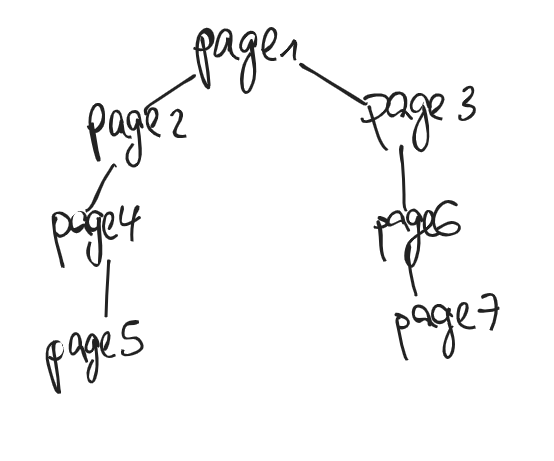

Then, if we call `get_pages_depth()` at `page_1` with `depth = 2`, then it should retrieve the pages `page_1`, `page_2`, `page_4`, `page_3` and `page_6`. We won't care about the order in which these pages are retrieved.

- Implement the function as a generator.

- Remember that a page might contain a link to a parent page, so try to take that into account.

- Consider any other edge cases that might happen, such as two pages leading to the same page. In that case, that page should only be retrieved once.

- Maybe you can add a decorator to handle such cases?

In [13]:
from functools import wraps


def check_url_in_cache(func):
    ''' Wrapper to store only first apearing of url in tree of links '''
    def wrapper(*args, **kwargs):
        if kwargs.get('url'):
            url = kwargs['url']
        else:
            url = args[0]
        if url not in wrapper.cache:
            wrapper.cache.add(url)
            yield from func(*args, **kwargs)
    wrapper.cache = set()
    return wrapper

In [14]:
@check_url_in_cache
def get_pages_depth(url: str, depth: int, max_count: int=10000):
    """
    Go as the dep as the given depth, through the links in the webpage at the given URL
    and yield the html content of each of them,

    :param url: A string that is the URL of the webpage
    :param depth: An integer that is the depth until which the function searches
    :param max_count: Maximum count of links per one url
    """
    try:
        response = requests.get(url)
        if response.ok:
            yield response.text
        else:
            yield

        if depth > 0:
            links = get_all_links(url)
            for link in links[:max_count]:
                yield from get_pages_depth(link, depth - 1, max_count)
    except Exception:
        pass

In [15]:
get_pages_depth.cache.clear()
pages = get_pages_depth(depth=2, url='http://en.wikipedia.org')

In [16]:
next(pages)

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipedia, the free encyclopedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-di

In [17]:
class GetPagesDepthTestCase(unittest.TestCase):
    def setUp(self):
        self.url = 'https://en.wikipedia.org/wiki/Main_Page'

    def test_no_exception(self):
        get_pages_depth.cache.clear()
        pages = get_pages_depth(depth=0, url='https://example.com/')
        next(pages)

    def test_deepness(self):
        get_pages_depth.cache.clear()
        pages = get_pages_depth(depth=1, url='https://example.com/')
        i = 0
        for _ in pages:
            i += 1
        self.assertEqual(i, 2)

    def test_dublicates_and_reverse_links(self):
        page_hashes = [hash(page) for page in get_pages_depth(depth=2, url=self.url, max_count=30)]
        self.assertEqual(len(page_hashes), len(set(page_hashes)))

    def test_wrong_url(self):
        pages = get_pages_depth(depth=2, url='https://sldfjasdf.com/', max_count=30)
        with self.assertRaises(StopIteration):
            next(pages)

In [18]:
if __name__ == '__main__':
    unittest.main(argv=['',], defaultTest='GetPagesDepthTestCase', exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 14.706s

OK


## Task 4

Create a class `ComputerScientist` that will contain information such as `name`, `birthdate`, `major_achievements`, `alma_mater`, etc.

- Implement the methods you consider appropriate.

- Make unit tests to make sure the methods work alright.

Write a script to go to this [list of computer scientists](https://en.wikipedia.org/wiki/List_of_computer_scientists) and fetch information about 100 random scientists from this list, and create a python `list` containing `ComputerScientist()` objects with the information retrieved from the given link.

In [19]:
class ComputerScientist:
    def __init__(self, name, birthdate='', alma_mater=[], known_for=[], awards=[]):
        self.name = name
        self.birthdate = birthdate
        self.alma_mater = alma_mater
        self.known_for = known_for
        self.awards = awards

    def __str__(self):
        return '\n'.join([f'{key:>11}: {value}' for key, value in vars(self).items()]) + '\n'

    def __repr__(self):
        return self.__str__()

    def get_attrs_dict(self):
        return {attr: getattr(self, attr) for attr in dir(self) if not attr.startswith('__')}

    def __eq__(self, other):
        if not isinstance(other, ComputerScientist):
            return False
        if (vars(self) == vars(other)):
            return True
        return False

In [33]:
import random
import unicodedata
import bs4
import re

def get_values_from_field(field: bs4.element.Tag):
    '''
    Parse row of Wikipedia's biography table

    :param field: bs4 tag of proper Wikipedia's biography table row
    '''
    wiki_to_bio = {'Born': 'birthdate', 'Alma mater': 'alma_mater', 'Known for': 'known_for', 'Awards': 'awards'}
    th_text = unicodedata.normalize("NFKD", field.find('th').text)
    label = wiki_to_bio.get(th_text)
    if label:
        if label == 'birthdate':
            birthdate = field.select('.bday')
            if len(birthdate):
                vals = birthdate[0].text
            else:
                vals = field.find('td').find(string=True, recursive=False)
                if vals:
                    vals = re.sub(r'(\(.*\))', r'', vals).strip()
                else:
                    vals = ''
        else:
            data_field = field.find('td')
            data_list = data_field.select('ul li')
            if len(data_list):  # well structured
                vals = [li.text for li in data_list]
            else:  # badly structured
                for br in data_field.find_all('br'):
                    br.replace_with('\n')
                vals = data_field.get_text().strip().split('\n')

        return label, vals
    return None, None


def process_data_table(data_table: bs4.element.Tag):
    '''
    Get proper information from Wikipedia's biography table

    :param data_table: bs4 tag of Wikipedia's biography table
    '''
    name = data_table.select('tr div.fn')[0].text
    name = re.sub(r'(\(.*\))', r'', name).strip()
    biography = data_table.select('tr:has(th.infobox-label)')

    bio = {'name': name, 'birthdate': '', 'alma_mater': [], 'known_for': [], 'awards': []}

    for field in biography:
        label, vals = get_values_from_field(field)
        if label:
            if isinstance(vals, list):
                bio[label].extend(vals)
            else:
                bio[label] = vals
    return bio


def get_scientist_info(url: str):
    '''
    Get information about a scientist from Wikipedia

    :param url: the URL string of the scientist's Wikipedia page
    '''
    response = requests.get(url)
    if not response.ok:
        return None
    soup = BeautifulSoup(response.text, 'lxml')


    data_table = soup.select('table.biography>tbody')
    if len(data_table):
        bio = process_data_table(data_table[0])
        return ComputerScientist(**bio)
    # if table info doesn't exist
    name = soup.find('h1', {'id': 'firstHeading'}).text
    return ComputerScientist(name=name)

def get_links_of_scientists(samples_num=100, url='https://en.wikipedia.org/wiki/List_of_computer_scientists'):
    '''
    Get list of links of scientists from the wikipedia page

    :param url: string link to the relevant Wikipedia page with a list of scientists
    :param samples_num: number of randomly obtained scientists from the list
    '''
    response = requests.get(url)
    if not response.ok:
        return
    soup = BeautifulSoup(response.text, 'lxml')

    scientists_links = []
    scientists_tags = soup.select('#mw-content-text .mw-content-ltr>ul:not([role="navigation"])>li:has(a:not(.external))')
    for sc in random.sample(scientists_tags, min(samples_num, len(scientists_tags))):
        sc_link = sc.find('a')['href']
        sc_link = prepare_link(sc_link, response.url)
        scientists_links.append(sc_link)
    return scientists_links


def get_list_of_scientists(samples_num=100):
    '''
    Get list of scientists from the wikipedia page

    :param samples_num: number of randomly obtained scientists from the list
    '''
    url='https://en.wikipedia.org/wiki/List_of_computer_scientists'

    scientists_links = get_links_of_scientists(samples_num, url)
    scientists = [get_scientist_info(sc_link) for sc_link in scientists_links]

    return scientists

In [21]:
scientists = get_list_of_scientists(samples_num=3)
print(*scientists, sep='\n')

       name: Edward Fredkin
  birthdate: 1934-10-02
 alma_mater: ['California Institute of Technology']
  known_for: ['Fredkin gate', "Fredkin's paradox", 'Billiard-ball computer', 'Second-order cellular automaton', 'Trie data structure']
     awards: ['Dickson Prize in Science 1984']

       name: Edgar "Ted" Codd
  birthdate: 1923-08-19
 alma_mater: ['Exeter College, Oxford', 'University of Michigan']
  known_for: ['Alpha language', 'Database normalization', 'OLAP', 'Relational model', "Codd's cellular automaton", "Codd's theorem", "Codd's 12 rules", 'Boyce–Codd normal form']
     awards: ['Turing Award (1981)[1]']

       name: Kenneth E. Iverson
  birthdate: 1920-12-17
 alma_mater: ["Queen's University", 'Harvard University']
  known_for: ['Programming languages: APL, J']
     awards: ['IBM Fellow', 'Harry H. Goode Memorial Award', 'Turing Award', 'Computer Pioneer Award']



In [22]:
class GetListOfScientistsTestCase(unittest.TestCase):
    def test_getting_scientists(self):
        scientists = get_list_of_scientists(samples_num=3)
        self.assertEqual(len(scientists), 3)

    def test_getting_computer_scientist(self):
        scientist = get_list_of_scientists(samples_num=1)[0]
        self.assertTrue(isinstance(scientist, ComputerScientist))


class GetScientistInfoTestCase(unittest.TestCase):
    def test_receiving_correct_information(self):
        expected_info = ComputerScientist(
            name='Gordon Bell',
            birthdate='1934-08-19',
            alma_mater= ['MIT (BS 1956, MS 1957)'],
            known_for= ['Computer architecture'],
            awards= ['National Medal of Technology', 'IEEE John von Neumann Medal', 'NAE Member', 'NAS Member', 'AAAS Fellow', 'IEEE Fellow', 'ACM Fellow', 'CHM Fellow']
            )

        gordon_bell_info = get_scientist_info('https://en.wikipedia.org/wiki/Gordon_Bell')
        self.assertEqual(expected_info, gordon_bell_info)


def GetListOfScientistsSuite():
    suite = unittest.TestSuite()
    suite.addTest(GetListOfScientistsTestCase('test_getting_scientists'))
    suite.addTest(GetListOfScientistsTestCase('test_getting_computer_scientist'))
    suite.addTest(GetScientistInfoTestCase('test_receiving_correct_information'))
    return suite

In [23]:
if __name__ == '__main__':
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(GetListOfScientistsSuite())

test_getting_scientists (__main__.GetListOfScientistsTestCase.test_getting_scientists) ... ok
test_getting_computer_scientist (__main__.GetListOfScientistsTestCase.test_getting_computer_scientist) ... ok
test_receiving_correct_information (__main__.GetScientistInfoTestCase.test_receiving_correct_information) ... ok

----------------------------------------------------------------------
Ran 3 tests in 1.410s

OK


# Task 5

Use the previously defined `ComputerScientist` class.

Add a new attribute `wikipedia_link` without modifying the definition of the original class. Consider using `setattr()`.

Write a function `fetch_scientist()` that will receive the name of a scientist, and will go to wikipedia and fetch the required scientist, and return a `ComputerScientist` object.

- Remember checking edge cases, such as the scientist not existing.

Add a decorator to cache the request, (i.e: store the answers, and if the scientist was already found before, to not execute the search again).

In [24]:
def fetch_scientist(scientist_name):
    '''
    Fetching a scientist by name, if one exists

    :param scientist_name: name of the requested scientist
    '''
    response = requests.get('https://en.wikipedia.org/wiki/List_of_computer_scientists')
    if not response.ok:
        return
    soup = BeautifulSoup(response.text, 'lxml')

    scientists_tags = soup.select('#mw-content-text .mw-content-ltr>ul>li')
    sc_link = ''
    for sc_tag in scientists_tags:
        sc_name = sc_tag.text.split(' – ')[0]
        sc_name = re.sub(r'(\(.*\))', r'', sc_name).strip()
        if scientist_name == sc_name:
            sc_link = sc_tag.find('a')['href']
            sc_link = prepare_link(sc_link, response.url)
            break

    if sc_link:
        scientist = get_scientist_info(sc_link)
        setattr(scientist, 'wikipedia_link', sc_link)
        return scientist
    return

In [25]:
fetch_scientist("Daniel Siewiorek")

       name: Daniel P. Siewiorek
  birthdate: 
 alma_mater: []
  known_for: ['Electronic design automation, reliability computing, and context aware mobile computing, wearable computing, computer-aided design, rapid prototyping, fault tolerance']
     awards: ['AAEE Terman Award', 'IEEE/ACM Eckert–Mauchly Award', 'ACM SIGMOBILE Outstanding Contributions Award', 'IEEE Computer Society Taylor L. Booth Education Award']
wikipedia_link: https://en.wikipedia.org/wiki/Daniel_Siewiorek

In [26]:
class FetchScientistTestCase(unittest.TestCase):
    def test_fetch_existing_scientist(self):
        url = 'https://en.wikipedia.org/wiki/Manuel_Blum'
        expected_scientist = get_scientist_info(url)
        setattr(expected_scientist, 'wikipedia_link', url)
        scientist = fetch_scientist('Manuel Blum')
        self.assertEqual(scientist, expected_scientist)

    def test_fetch_not_computer_scientist(self):
        scientist = fetch_scientist('Immanuel Kant')
        self.assertIsNone(scientist)

    def test_fetch_wrong_name(self):
        scientist = fetch_scientist('Some wrong name 1')
        self.assertIsNone(scientist)

In [27]:
if __name__ == '__main__':
    unittest.main(argv=['',], defaultTest='FetchScientistTestCase', exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 1.236s

OK


# Task 6**

Consider the directed graph where the nodes represent the wikipedia pages of the scientists and the edges represent whether a scientist's page contains a link to the page of another scientist.

Implement a class named `ScientistGraph`, with some attributes and methods like:
- `scientist_list : list[ComputerScientist]`: the list of all scientists
- `graph`: the graph of scientists connected to other scientists (you can use the graph object from `network`, or implement your own way of storing the graph, for e.g: with an adjacency list or an adjacency matrix).
- `add_scientist(scientist_name: str)`: method that will receive the name of the scientist, fetch the corresponding wikipedia page, create the corresponding `ComputerScientist` object, and will add the new edges involving that scientist to the graph. Consider edge cases like the name being incorrect or the scientist being already stored.
- `remove_scientist(scientist_name: str)`: method that will receive the name of a scientist, remove them from the list and removing its node and the edges involving it from the graph. Consider edge cases like the name being incorrect or the scientist not being stored.
- `plot()`: method that will visualize the graph. Show how the graph changes when adding someone new or deleting someone. Bonus: perhaps you want to implement it in a dynamic way, so each time that a scientist is removed from or added to the graph, the visualization changes.
- `rank_scientists():` method that will rank scientists. For this method you can be as creative as you wish: You can start by designing a ranking based on the number of neighbours of each scientists, or the number of times a scientist is mentioned in one of the articles, or by using the famous `PageRank (you need to google it)`, etc., or by any other methods you might like to consider.

Show the usage of these methods in a proper way.
Feel free to add more functionalities.

In [28]:
!pip install pyvis -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.0 MB/s eta 0:00:00


In [48]:
import networkx as nx
from pyvis import network as net
from IPython.display import display, HTML
from collections import Counter


class ScientistGraph:
    __default_node_color = '#97C2FC'
    __default_edge_color = '#648FC9'
    __deleted_node_color = '#DD0525'
    __deleted_edge_color = '#F90B31'
    __new_node_color = '#4EB33F'
    __new_edge_color = '#6FBD27'
    __default_node_size = 2

    def __init__(self, scientist_list: list=[]):
        '''
        Initialization of scientists graph

        :param scientist_list: list of ComputerScientist with attribute 'wikipedia_link'
        '''
        self.__scientists_links = set(get_links_of_scientists(samples_num=10000))
        self.__link_edges_cnt = {}
        self.__scientists = {sc.name: sc for sc in scientist_list}
        self.__graph = nx.Graph()
        for sc in self.__scientists.values():
            self.__add_node(sc.name)
            self.__fetch_scientist_connections(sc)
            self.__update_scientist_edges(sc)

    def __fetch_scientist_connections(self, scientist: ComputerScientist):
        links_cnt = Counter(get_all_links(scientist.wikipedia_link))
        for sc_link, cnt in links_cnt.items():
            if sc_link in self.__scientists_links:
                self.__link_edges_cnt[(scientist.wikipedia_link, sc_link)] = cnt

    def __update_scientist_edges(self, scientist: ComputerScientist, color: str=None):
        '''
        Search connection of the scientist with other other scientists in the graph
        on the wikipedia page

        :param scientist: ComputerScientist for which is needed to update edges
        :param color: color of edges
        '''
        if color is None:
            color = self.__default_edge_color

        for sc in self.__scientists.values():
            if sc.wikipedia_link != scientist.wikipedia_link:
                total_links_count = (self.__link_edges_cnt.get((scientist.wikipedia_link, sc.wikipedia_link), 0) +
                                     self.__link_edges_cnt.get((sc.wikipedia_link, scientist.wikipedia_link), 0))
                if total_links_count:
                    edge_size = min(20, total_links_count)
                    self.__graph.add_edge(sc.name, scientist.name, color=color, links_count=edge_size)

    def __add_node(self, scientist_name: str, color: str=None):
        '''
        Add node to the graph

        :param scientist_name: the name of the scientist for whom the node is being added
        :param color: color of node
        '''
        if color is None:
            color = self.__default_node_color
        self.__graph.add_node(scientist_name, color=color)

    def add_scientist(self, scientist_name: str):
        '''
        Add scientist by name to the graph if one exists

        :param scientist_name: scientist name to add
        '''
        new_scientist = fetch_scientist(scientist_name)
        if new_scientist and new_scientist.name not in self.__scientists:
            self.__scientists[new_scientist.name] = new_scientist
            self.__add_node(new_scientist.name, color=self.__new_node_color)
            self.__fetch_scientist_connections(new_scientist)
            self.__update_scientist_edges(new_scientist, color=self.__new_edge_color)

    def remove_scientist(self, scientist_name: str):
        '''
        Remove scientist by name from the graph if one exists

        :param scientist_name: scientist name to remove
        '''
        if scientist_name in self.__scientists:
            del self.__scientists[scientist_name]
            if self.__graph.has_node(scientist_name):
                for edge in self.__graph.edges(scientist_name):
                    self.__graph.add_edge(*edge, color=self.__deleted_edge_color)
                self.__graph.add_node(scientist_name, color=self.__deleted_node_color)

    def plot(self):
        ''' Display the graph of class '''
        g=net.Network(notebook=True, cdn_resources='in_line', bgcolor='#202020', font_color='white')
        g.from_nx(self.__graph)
        # to avoid resetting 'width' to 1 for edges in the original graph, another name is used: 'links_count'
        for e in g.edges:
            e['width'] = e['links_count']
        g.show('nx.html');
        display(HTML('nx.html'));

    def rank_scientists(self):
        ''' Rank scientists in a graph based on the number of their connections '''
        rank = {key:deg + self.__default_node_size for key, deg in dict(self.__graph.degree).items()}
        nx.set_node_attributes(self.__graph, rank, 'size')

In [30]:
def generate_list_of_scientists(samples_num=100):
    ''' Generate list of scientists for ScientistGraph '''
    scientists_links = get_links_of_scientists(samples_num + 5)
    scientists_list = []
    for sc_link in scientists_links:
        scientist = get_scientist_info(sc_link)
        if scientist:  # sometimes wikipedia response 404 even on existing pages
            setattr(scientist, 'wikipedia_link', sc_link)
            scientists_list.append(scientist)
        if len(scientists_list) == samples_num:
            break
    return scientists_list

In [94]:
scientists_list = generate_list_of_scientists(samples_num=80)

In [95]:
sc_graph = ScientistGraph(scientists_list)

In [96]:
sc_graph.rank_scientists()

In [97]:
sc_graph.plot()

nx.html


In [98]:
sc_name_to_remove = scientists_list[0].name
for name, deg in dict(sc_graph._ScientistGraph__graph.degree).items():
    if deg >= 2:  # easier to see
        sc_name_to_remove = name
        print(f"Delete scientist: {name}")
        break
sc_graph.remove_scientist(sc_name_to_remove)

Delete scientist: Stephen Richard Bourne


In [99]:
sc_graph.add_scientist('John McCarthy')

In [100]:
sc_graph.plot()

nx.html


In [88]:
from copy import deepcopy


class ScientistGraphTestCase(unittest.TestCase):
    def setUp(self):
        self.sc_graph = ScientistGraph()
        self.sc_bern = 'Bernard Richards'
        self.sc_alan = 'Alan Turing'
        self.sc_linus = 'Linus Torvalds'
        self.sc_graph.add_scientist(self.sc_bern)
        self.sc_graph.add_scientist(self.sc_alan)
        self.sc_graph.add_scientist(self.sc_linus)

    def test_init(self):
        sc_list = generate_list_of_scientists(samples_num=10)
        sc_graph = ScientistGraph(sc_list)
        for sc in sc_list:
            self.assertIn(sc.name, sc_graph._ScientistGraph__scientists)
            self.assertEqual(sc, sc_graph._ScientistGraph__scientists[sc.name])
            self.assertIn(sc.name, sc_graph._ScientistGraph__graph.nodes)

    def test_add_scientist(self):
        sc_name = 'John McCarthy'
        sc_graph = ScientistGraph()
        sc_graph.add_scientist(sc_name)
        self.assertIn(sc_name, sc_graph._ScientistGraph__scientists)
        self.assertIn(sc_name, sc_graph._ScientistGraph__graph.nodes)

    def test_add_scientist_with_wrong_name(self):
        sc_name = 'Wrong name 1'
        sc_graph = ScientistGraph()
        sc_graph.add_scientist(sc_name)
        self.assertNotIn(sc_name, sc_graph._ScientistGraph__scientists)
        self.assertNotIn(sc_name, sc_graph._ScientistGraph__graph.nodes)

    def test_remove_scientist_with_wrong_name(self):
        sc_name = 'Wrong name 1'
        sc_graph = deepcopy(self.sc_graph)
        sc_graph.remove_scientist(sc_name)
        self.assertNotIn(sc_name, sc_graph._ScientistGraph__scientists)
        self.assertNotIn(sc_name, sc_graph._ScientistGraph__graph.nodes)

    def test_remove_scientist(self):
        sc_graph = deepcopy(self.sc_graph)

        degree_before_removing = dict(sc_graph._ScientistGraph__graph.degree)[self.sc_alan]
        sc_graph.remove_scientist(self.sc_alan)
        degree_after_removing = dict(sc_graph._ScientistGraph__graph.degree)[self.sc_alan]

        self.assertNotIn(self.sc_alan, sc_graph._ScientistGraph__scientists)

        # coloring nodes and edges, but not removing
        self.assertIn(self.sc_alan, sc_graph._ScientistGraph__graph.nodes)
        self.assertEqual(degree_before_removing, degree_after_removing)

    def test_add_edges(self):
        sc_graph = deepcopy(self.sc_graph)
        edges = list(sc_graph._ScientistGraph__graph.edges)
        self.assertTrue((self.sc_bern, self.sc_alan) in edges or (self.sc_alan, self.sc_bern) in edges)
        self.assertTrue((self.sc_alan, self.sc_linus) in edges or (self.sc_linus, self.sc_alan) in edges)
        self.assertTrue((self.sc_linus, self.sc_bern) not in edges and (self.sc_bern, self.sc_linus) not in edges)

    def test_ranking(self):
        sc_graph = deepcopy(self.sc_graph)

        sc_graph.rank_scientists()
        sc_nodes = dict(sc_graph._ScientistGraph__graph.nodes)
        sc_alan_rank = sc_nodes[self.sc_alan]['size']
        self.assertEqual(sc_alan_rank, 4)  # num_of_edges + default_node_size

In [89]:
if __name__ == '__main__':
    unittest.main(argv=['',], defaultTest='ScientistGraphTestCase', exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 28.150s

OK
